# SISD

In [1]:
import numpy as np
import time

# Creamos dos arrays grandes
a = np.random.rand(10000)
b = np.random.rand(10000)
c = np.empty(10000)

start = time.time()
for i in range(10000):
    c[i] = a[i] + b[i]
end = time.time()

print("Tiempo con bucle for:", end - start, "segundos")

Tiempo con bucle for: 0.0038738250732421875 segundos


# SIMD

In [2]:
start = time.time()
c = a + b  # Esta operación se realiza en paralelo internamente
end = time.time()

print("Tiempo con NumPy vectorizado:", end - start, "segundos")

Tiempo con NumPy vectorizado: 0.0007026195526123047 segundos


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Generar 500 registros de logs simulados
np.random.seed(42)

# Lista de eventos de seguridad
eventos = ['login_success', 'login_failure', 'file_access', 'admin_login', 
           'password_change', 'firewall_block', 'suspicious_activity', 
           'malware_detected', 'port_scan']

In [7]:
# Generar timestamps para una semana
fechas = pd.date_range(start='2023-01-01', periods=7)
timestamps = []
for fecha in fechas:
    for hora in range(24):
        for _ in range(3):  # 3 eventos por hora aprox
            timestamps.append(fecha + pd.Timedelta(hours=hora) + 
                             pd.Timedelta(minutes=np.random.randint(60)))

In [8]:
print(fechas)

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07'],
              dtype='datetime64[ns]', freq='D')


In [9]:
print(timestamps)

[Timestamp('2023-01-01 00:44:00'), Timestamp('2023-01-01 00:19:00'), Timestamp('2023-01-01 00:00:00'), Timestamp('2023-01-01 01:07:00'), Timestamp('2023-01-01 01:45:00'), Timestamp('2023-01-01 01:15:00'), Timestamp('2023-01-01 02:13:00'), Timestamp('2023-01-01 02:11:00'), Timestamp('2023-01-01 02:50:00'), Timestamp('2023-01-01 03:22:00'), Timestamp('2023-01-01 03:14:00'), Timestamp('2023-01-01 03:27:00'), Timestamp('2023-01-01 04:33:00'), Timestamp('2023-01-01 04:01:00'), Timestamp('2023-01-01 04:31:00'), Timestamp('2023-01-01 05:22:00'), Timestamp('2023-01-01 05:21:00'), Timestamp('2023-01-01 05:50:00'), Timestamp('2023-01-01 06:24:00'), Timestamp('2023-01-01 06:57:00'), Timestamp('2023-01-01 06:21:00'), Timestamp('2023-01-01 07:57:00'), Timestamp('2023-01-01 07:57:00'), Timestamp('2023-01-01 07:21:00'), Timestamp('2023-01-01 08:48:00'), Timestamp('2023-01-01 08:51:00'), Timestamp('2023-01-01 08:41:00'), Timestamp('2023-01-01 09:05:00'), Timestamp('2023-01-01 09:14:00'), Timestamp('20

In [10]:
# Ajustar al número de registros deseados
timestamps = timestamps[:500]

# Generar IPs aleatorias
def random_ip():
    return f"{np.random.randint(1, 256)}.{np.random.randint(1, 256)}.{np.random.randint(1, 256)}.{np.random.randint(1, 256)}"

# Usuarios del sistema
usuarios = ['admin', 'user1', 'user2', 'user3', 'system', 'guest', None]

# Generar datos simulados
data = {
    'timestamp': timestamps,
    'ip_origen': [random_ip() for _ in range(500)],
    'evento': np.random.choice(eventos, 500, p=[0.3, 0.2, 0.2, 0.05, 0.05, 0.08, 0.07, 0.03, 0.02]),
    'usuario': np.random.choice(usuarios, 500, p=[0.1, 0.2, 0.2, 0.2, 0.1, 0.1, 0.1]),
    'severidad': np.random.choice(['low', 'medium', 'high', 'critical'], 500, p=[0.5, 0.3, 0.15, 0.05]),
    'exitoso': np.random.choice([True, False], 500, p=[0.8, 0.2]),
}

In [11]:
len(timestamps)

500

In [12]:
print(usuarios)

['admin', 'user1', 'user2', 'user3', 'system', 'guest', None]


In [13]:
print(data)

{'timestamp': [Timestamp('2023-01-01 00:44:00'), Timestamp('2023-01-01 00:19:00'), Timestamp('2023-01-01 00:00:00'), Timestamp('2023-01-01 01:07:00'), Timestamp('2023-01-01 01:45:00'), Timestamp('2023-01-01 01:15:00'), Timestamp('2023-01-01 02:13:00'), Timestamp('2023-01-01 02:11:00'), Timestamp('2023-01-01 02:50:00'), Timestamp('2023-01-01 03:22:00'), Timestamp('2023-01-01 03:14:00'), Timestamp('2023-01-01 03:27:00'), Timestamp('2023-01-01 04:33:00'), Timestamp('2023-01-01 04:01:00'), Timestamp('2023-01-01 04:31:00'), Timestamp('2023-01-01 05:22:00'), Timestamp('2023-01-01 05:21:00'), Timestamp('2023-01-01 05:50:00'), Timestamp('2023-01-01 06:24:00'), Timestamp('2023-01-01 06:57:00'), Timestamp('2023-01-01 06:21:00'), Timestamp('2023-01-01 07:57:00'), Timestamp('2023-01-01 07:57:00'), Timestamp('2023-01-01 07:21:00'), Timestamp('2023-01-01 08:48:00'), Timestamp('2023-01-01 08:51:00'), Timestamp('2023-01-01 08:41:00'), Timestamp('2023-01-01 09:05:00'), Timestamp('2023-01-01 09:14:00'),

In [14]:
# Crear DataFrame
logs_df = pd.DataFrame(data)

# Configurar timestamp como índice
logs_df['timestamp'] = pd.to_datetime(logs_df['timestamp'])
logs_df = logs_df.sort_values('timestamp')

# Ahora creamos las visualizaciones
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

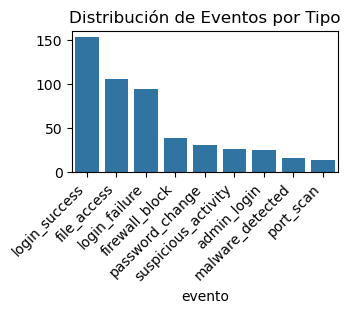

In [15]:
# 1. Distribución de eventos por tipo
plt.subplot(2, 2, 1)
eventos_count = logs_df['evento'].value_counts()
sns.barplot(x=eventos_count.index, y=eventos_count.values)
plt.xticks(rotation=45, ha='right')
plt.title('Distribución de Eventos por Tipo')
plt.tight_layout()

Text(0.5, 1.0, 'Distribución de Eventos por Severidad')

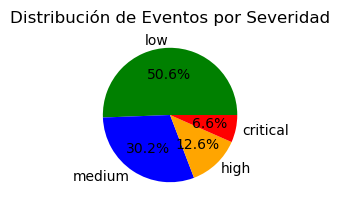

In [ ]:
# 2. Distribución de eventos por severidad
plt.subplot(2, 2, 2)
severidad_count = logs_df['severidad'].value_counts()
colors = {'low': 'green', 'medium': 'blue', 'high': 'orange', 'critical': 'red'}
plt.pie(severidad_count, labels=severidad_count.index, autopct='%1.1f%%',
        colors=[colors[sev] for sev in severidad_count.index])
plt.title('Distribución de Eventos por Severidad')

Text(0, 0.5, 'Número de Eventos')

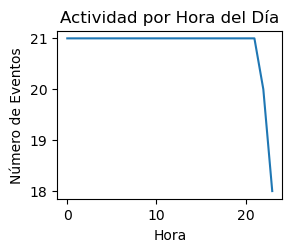

In [17]:
# 3. Actividad por hora del día
plt.subplot(2, 2, 3)
logs_df['hour'] = logs_df['timestamp'].dt.hour
hourly_count = logs_df.groupby('hour').size()
sns.lineplot(x=hourly_count.index, y=hourly_count.values)
plt.title('Actividad por Hora del Día')
plt.xlabel('Hora')
plt.ylabel('Número de Eventos')

In [18]:
logs_df

,timestamp,ip_origen,evento,usuario,severidad,exitoso,hour
2,2023-01-01 00:00:00,236.133.222.222,firewall_block,user1,high,True,0
1,2023-01-01 00:19:00,50.12.193.54,file_access,user2,low,True,0
0,2023-01-01 00:44:00,182.118.3.123,malware_detected,user2,low,True,0
3,2023-01-01 01:07:00,251.57.145.112,suspicious_activity,None,high,True,1
5,2023-01-01 01:15:00,229.85.142.66,login_success,user3,critical,False,1
...,...,...,...,...,...,...,...
497,2023-01-07 21:27:00,36.84.196.118,admin_login,user2,low,True,21
495,2023-01-07 21:31:00,71.191.56.241,admin_login,user2,medium,True,21
496,2023-01-07 21:33:00,170.189.42.184,login_success,admin,low,True,21
499,2023-01-07 22:07:00,120.173.106.47,login_success,admin,low,True,22


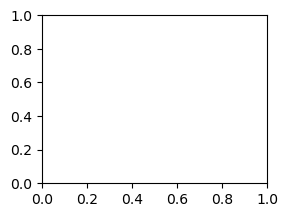

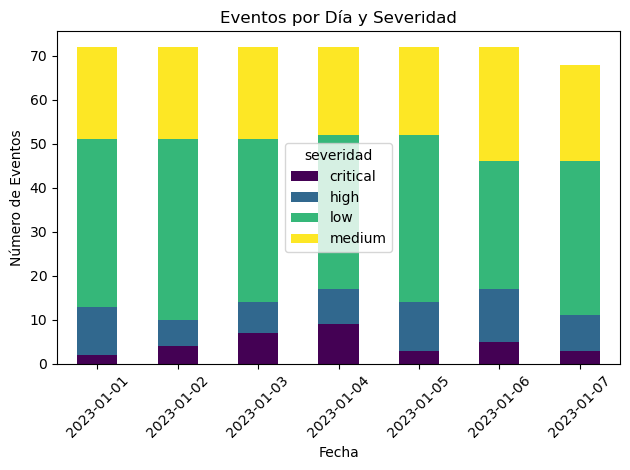

In [19]:
# 4. Eventos por día y por severidad
plt.subplot(2, 2, 4)
logs_df['date'] = logs_df['timestamp'].dt.date
pivot_table = pd.crosstab(logs_df['date'], logs_df['severidad'])
pivot_table.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Eventos por Día y Severidad')
plt.xlabel('Fecha')
plt.ylabel('Número de Eventos')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('security_dashboard.png')

In [20]:
pivot_table

severidad,critical,high,low,medium
date,,,,
2023-01-01,2,11,38,21
2023-01-02,4,6,41,21
2023-01-03,7,7,37,21
2023-01-04,9,8,35,20
2023-01-05,3,11,38,20
2023-01-06,5,12,29,26
2023-01-07,3,8,35,22


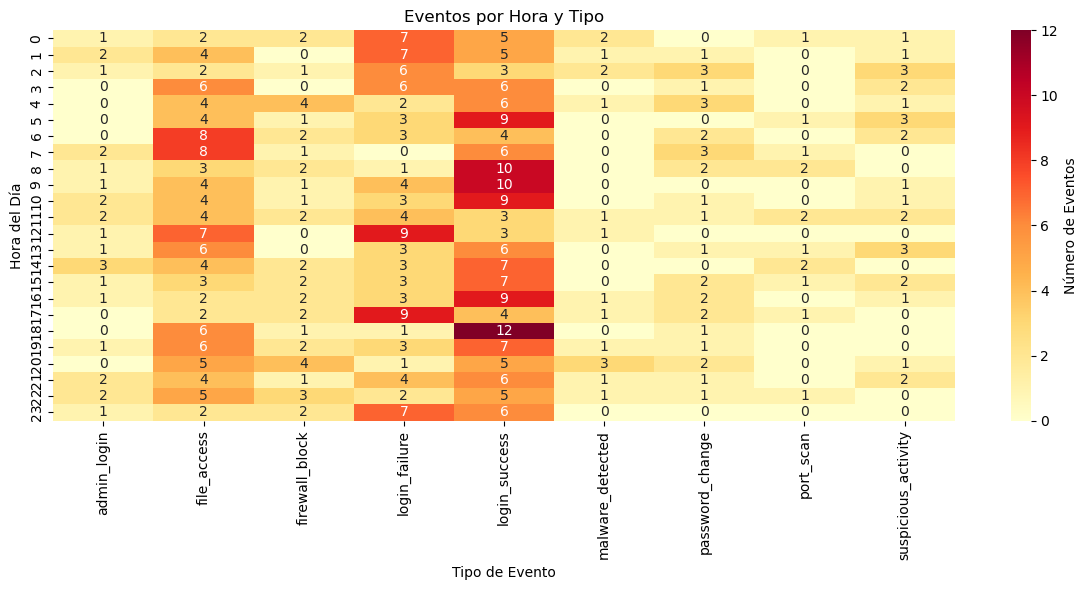

In [21]:
# Crear gráfico de actividad sospechosa
plt.figure(figsize=(12, 6))

# 5. Mapa de calor de actividad por hora y tipo de evento
logs_df['hour'] = logs_df['timestamp'].dt.hour
heatmap_data = pd.crosstab(logs_df['hour'], logs_df['evento'])
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='d', cbar_kws={'label': 'Número de Eventos'})
plt.title('Eventos por Hora y Tipo')
plt.xlabel('Tipo de Evento')
plt.ylabel('Hora del Día')
plt.tight_layout()
plt.savefig('activity_heatmap.png')

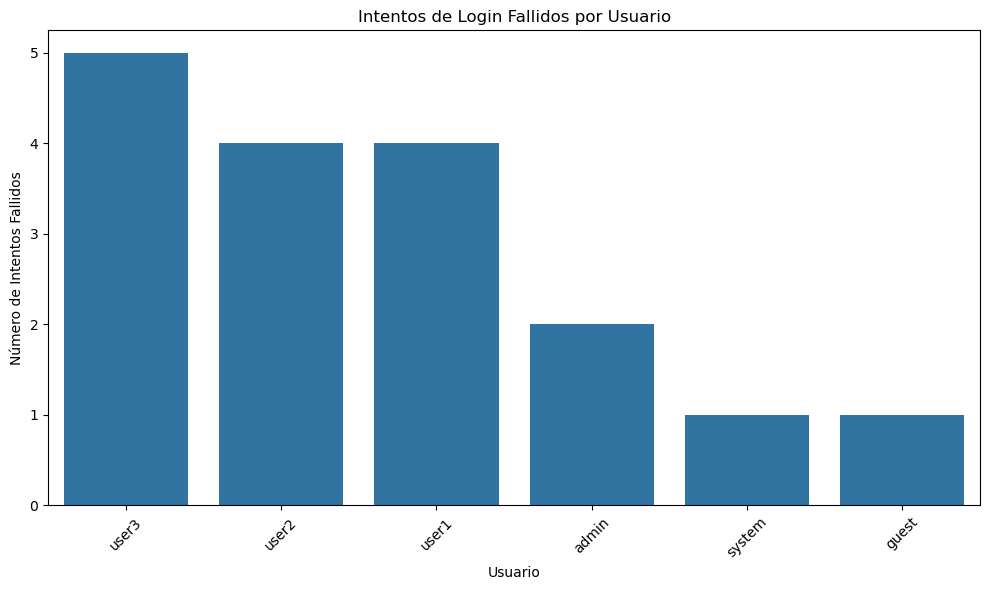

In [22]:
# 6. Análisis de accesos fallidos por usuario
plt.figure(figsize=(10, 6))
failed_logins = logs_df[(logs_df['evento'] == 'login_failure') & (logs_df['exitoso'] == False)]
user_failures = failed_logins['usuario'].value_counts()
sns.barplot(x=user_failures.index.fillna('anónimo'), y=user_failures.values)
plt.title('Intentos de Login Fallidos por Usuario')
plt.xlabel('Usuario')
plt.ylabel('Número de Intentos Fallidos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('failed_logins_by_user.png')

Visualizaciones generadas correctamente. Revisa los archivos .png generados.


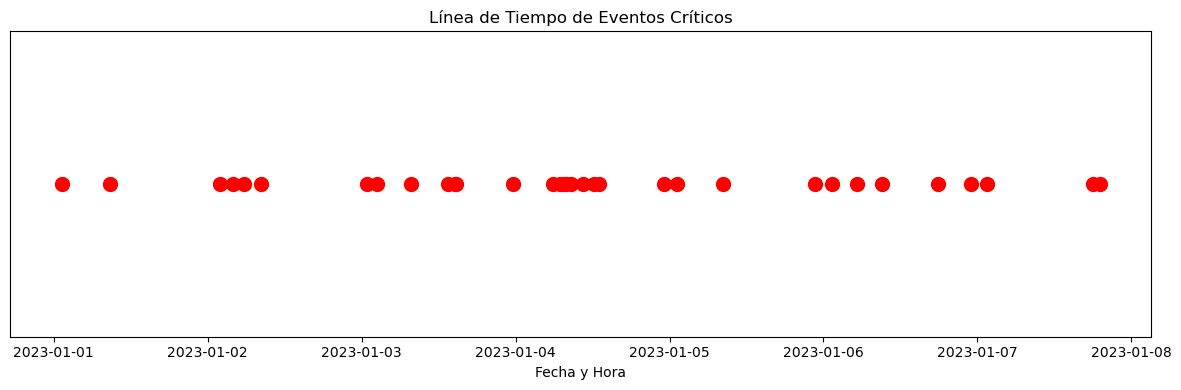

In [23]:
# 7. Línea de tiempo de eventos críticos
plt.figure(figsize=(12, 4))
critical_events = logs_df[logs_df['severidad'] == 'critical']
plt.scatter(critical_events['timestamp'], [1]*len(critical_events), c='red', s=100)
plt.yticks([])
plt.title('Línea de Tiempo de Eventos Críticos')
plt.xlabel('Fecha y Hora')
plt.tight_layout()
plt.savefig('critical_events_timeline.png')

print("Visualizaciones generadas correctamente. Revisa los archivos .png generados.")